## Titanic ML Project

### The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Reading in the data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## EDA and Pre-processing

### Visualizations

In [5]:
# Number of entries in training set.
len(train)

891

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Count of the number of survivors and non-survivors on the Titanic

In [7]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Visualize the  Distribution of Survivors

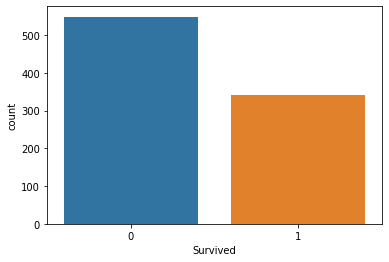

In [8]:
ax = sns.countplot(x="Survived", data=train)

#### Visualize the Distribution of Pclass

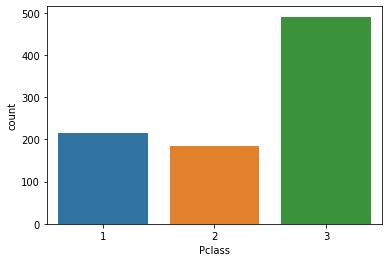

In [9]:
ax = sns.countplot(x="Pclass", data=train)

#### Visualize the Distribution of Sex

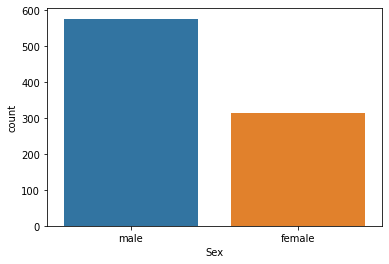

In [10]:
ax = sns.countplot(x="Sex", data=train)

#### Visualize the Counts of Survivors Based on Each Variable

In [11]:
vis_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

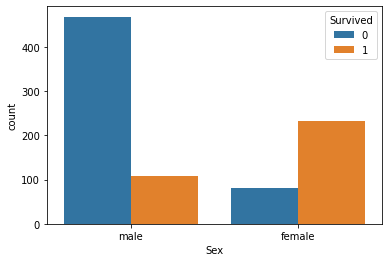

In [12]:
ax = sns.countplot(x="Sex", hue=train['Survived'], data=train)

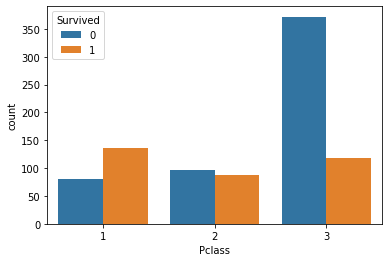

In [13]:
ax = sns.countplot(x="Pclass", hue=train['Survived'], data=train)

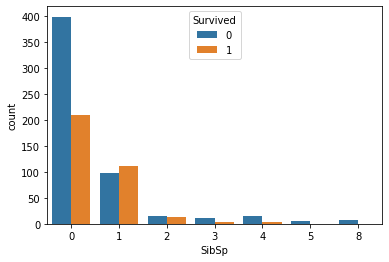

In [14]:
ax = sns.countplot(x="SibSp", hue=train['Survived'], data=train)

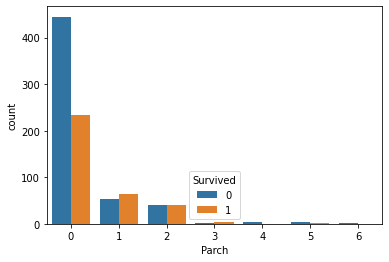

In [15]:
ax = sns.countplot(x="Parch", hue=train['Survived'], data=train)

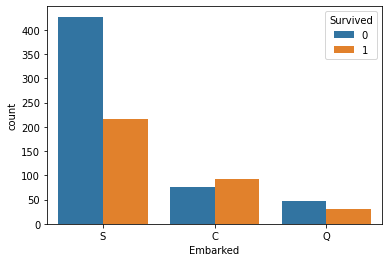

In [16]:
ax = sns.countplot(x="Embarked", hue=train['Survived'], data=train)

In [17]:
# Survival Rate by Sex
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [18]:
# Survival Rate by Sex and Pclass
train.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Females in first class have a 96.8% chance of survival(highest survival rate).

Males in third class have a 13.5% chance of survival(lowest survival rate).

<AxesSubplot:xlabel='Sex'>

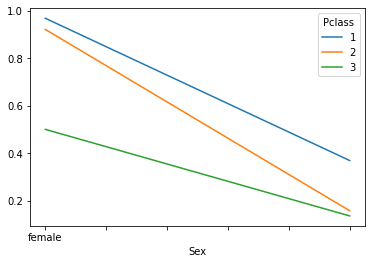

In [19]:
# Survival Rate by Sex and Pclass visually
train.pivot_table('Survived', index='Sex', columns='Pclass').plot()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

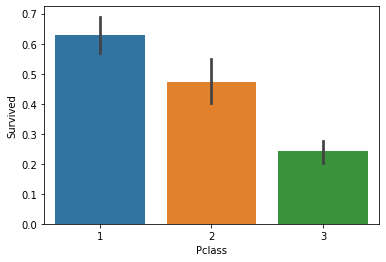

In [20]:
# Plot the survival rate of each Pclass
sns.barplot(x='Pclass', y='Survived', data=train)

In [21]:
# Look at survival rate by sex, age, and class.
age = pd.cut(train['Age'], [0, 18, 80])
train.pivot_table('Survived', index = ['Sex', age], columns='Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [22]:
age.unique()

[(18.0, 80.0], NaN, (0.0, 18.0]]
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [23]:
age

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: Age, Length: 891, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

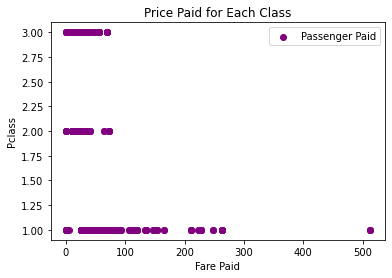

In [24]:
# Plot the prices paid for each Pclass
plt.scatter(x='Fare', y='Pclass', data=train, color='purple', label='Passenger Paid')
plt.xlabel('Fare Paid')
plt.ylabel('Pclass')
plt.title('Price Paid for Each Class')
plt.legend()
plt.show()

###  Dealing with Null Values

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Age Column

In [26]:
# We have 177 null values in the 'Age' column.
train['Age'].isna().sum()

177

In [27]:
print("The null values in the 'Age' column make up ", ((train['Age'].isna().sum())/len(train))*100, '% of the column.')

The null values in the 'Age' column make up  19.865319865319865 % of the column.


In [28]:
# Instead of dropping the null values, we will instead impute them with the mean.
train['Age'].mean()

29.69911764705882

In [29]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


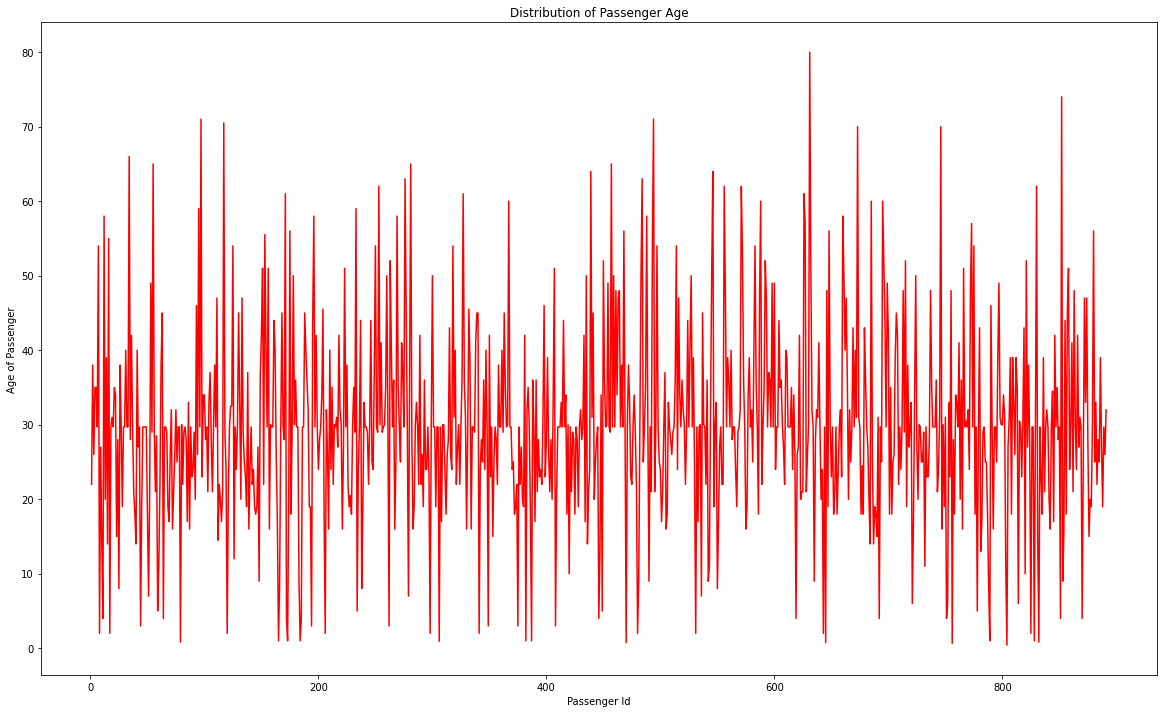

In [31]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(12)

ax = sns.lineplot(x=tuple(train['PassengerId']), y=tuple(train['Age']), data=train, color='red')
ax.set(xlabel='Passenger Id', ylabel='Age of Passenger')

plt.title('Distribution of Passenger Age')
plt.show()

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Cabin Column

In [33]:
# We have 687 NA values in 'Cabin'
train['Cabin'].isna().sum()

687

In [34]:
print("The null values in the 'Cabin' column make up ", ((train['Cabin'].isna().sum())/len(train))*100, '% of the column.')

The null values in the 'Cabin' column make up  77.10437710437711 % of the column.


In [35]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Due to the high percentage of NA values in the 'Cabin' column, it may be fine to simply just drop the column.

In [36]:
train = train.drop(columns=['Cabin'], axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [38]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#### Embarked Column

In [39]:
train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

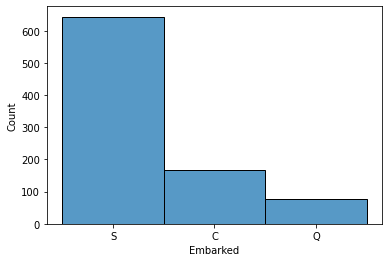

In [40]:
sns.histplot(data=train, x="Embarked")

In [41]:
# The most common 'Embarked' value is SouthHampton(S), so we will impute the 2 missing values with 'S'.

In [42]:
train['Embarked'] = train['Embarked'].fillna('S')

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [44]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Exploring the 'Fare' Column

In [45]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

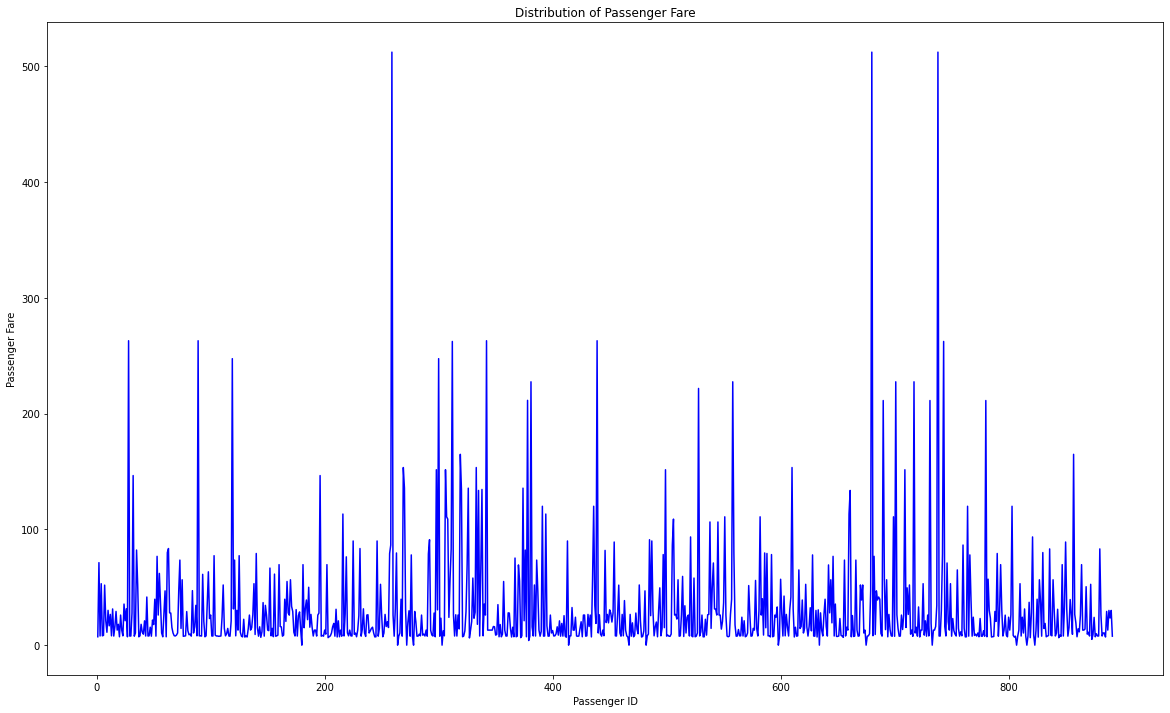

In [46]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(12)

ax = sns.lineplot(x=tuple(train['PassengerId']), y=tuple(train['Fare']), data=train, color='blue')

ax.set(xlabel='Passenger ID', ylabel= 'Passenger Fare')

plt.title('Distribution of Passenger Fare')
plt.show()

Based on this plot, it seems we had a lot of passengers whose fares were not that high. The extremely high fares are outliers, so it is likely that a lot of middle to lower class passengers made up the majority of the Titanic.

### Variance Inflation Factor

In [47]:
# calculate Variance Inflation Factor for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

In [48]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [49]:
# Examining the VIFs of our numerical variables
cols = ['Age', 'SibSp', 'Parch', 'Fare']
VIF(train, cols)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Age      1.091901
SibSp    1.260841
Parch    1.260220
Fare     1.080711
dtype: float64

## Creating Dummy Variables for Categorical Variables

### Create Dummy Variables for Sex Column

We can turn the 'Sex' column into categorical variables.

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [52]:
categorical_cols = ['Sex']
categorical_cols

['Sex']

In [53]:
train_enc = pd.get_dummies(train, columns=categorical_cols)
train_enc

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C,0,1


### Creating Dummy Variables for 'Pclass' column

Ticket class of the passenger.
1 means first class.
2 means second class.
3 means third class.

In [54]:
categorical_cols2 = ['Pclass']
categorical_cols2

['Pclass']

In [55]:
train_enc = pd.get_dummies(train_enc, columns=categorical_cols2)
train_enc

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,1,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,S,0,1,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,S,1,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,S,1,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C,0,1,1,0,0


### Creating Dummy Variables for 'Embarked' column

Port of Embarkation	

C = Cherbourg, Q = Queenstown, S = Southampton

In [56]:
categorical_cols3 = ['Embarked']
categorical_cols3

['Embarked']

In [57]:
train_enc = pd.get_dummies(train_enc, columns=categorical_cols3)
train_enc

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,0,1,0,1,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,1,0,1,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,1,0,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,0,1,1,0,0,1,0,0


### Removing Columns That May Not Be Too Informative

While exploring the data, I decided that we could remove some of our columns from our training set.

The 'Name' column for example does not have any predictive power. Same goes for the ticket number and PassengerId so we can drop those 3 columns.

In [58]:
train_enc = train_enc.drop(columns=['Name', 'Ticket', 'PassengerId'], axis=1)
train_enc

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.000000,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,1,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,1,0,0,0,0,1
888,0,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0,1,0,0


In [59]:
# Preserving the PassengerId column so we can idnetify the passengers later.
passengerID_train = train['PassengerId']
passengerID_train

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

### Applying Pre-processing to Test Set

In [60]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 'Age' column in test set

In [61]:
# We have 86 null values in the 'Age' column.
test['Age'].isna().sum()

86

In [62]:
print("The null values in the 'Age' column make up ", ((test['Age'].isna().sum())/len(test))*100, '% of the column.')

The null values in the 'Age' column make up  20.574162679425836 % of the column.


In [63]:
# Instead of dropping the null values, we will instead impute them with the mean.
test['Age'].mean()

30.272590361445783

In [64]:
# We will use the same mean as the TRAINING set to remain consistent.
test['Age'] = test['Age'].fillna(train['Age'].mean())

In [65]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 'Fare' column in testing set

In [66]:
test['Fare'].isna().sum()

1

In [67]:
print("The null values in the 'Age' column make up ", ((test['Fare'].isna().sum())/len(test))*100, '% of the column.')

The null values in the 'Age' column make up  0.23923444976076555 % of the column.


In [68]:
# Instead of dropping the null values, we will instead impute them with the mean from the TRAINING SET.
train['Fare'].mean()

32.204207968574636

In [69]:
# We will use the same mean as the TRAINING set to remain consistent.
test['Fare'] = test['Fare'].fillna(train['Fare'].mean())

In [70]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

#### 'Cabin' column in testing set

In [71]:
test['Cabin']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object

In [72]:
print("The null values in the 'Cabin' column make up ", ((test['Cabin'].isna().sum())/len(test))*100, '% of the column.')

The null values in the 'Cabin' column make up  78.22966507177034 % of the column.


Due to the high percentage of NA values in the 'Cabin' column, it may be fine to simply just drop the column.

In [73]:
test = test.drop(columns=['Cabin'], axis=1)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,S


In [74]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [76]:
len(test)

418

In [77]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.154603,0.447368,0.392344,35.619000
std,120.810458,0.841838,12.636666,0.896760,0.981429,55.840751
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Creating Dummy Variables for the Testing Set

In [78]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [79]:
categorical_cols4 = ['Sex', 'Pclass', 'Embarked']

In [80]:
test_enc = pd.get_dummies(test, columns=categorical_cols4)
test_enc

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.500000,0,0,330911,7.8292,0,1,0,0,1,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.000000,1,0,363272,7.0000,1,0,0,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.000000,0,0,240276,9.6875,0,1,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",27.000000,0,0,315154,8.6625,0,1,0,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.000000,1,1,3101298,12.2875,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",29.699118,0,0,A.5. 3236,8.0500,0,1,0,0,1,0,0,1
414,1306,"Oliva y Ocana, Dona. Fermina",39.000000,0,0,PC 17758,108.9000,1,0,1,0,0,1,0,0
415,1307,"Saether, Mr. Simon Sivertsen",38.500000,0,0,SOTON/O.Q. 3101262,7.2500,0,1,0,0,1,0,0,1
416,1308,"Ware, Mr. Frederick",29.699118,0,0,359309,8.0500,0,1,0,0,1,0,0,1


### Removing Columns That May Not Be Too Informative (Test Set)

In [81]:
test_enc = test_enc.drop(columns=['Name', 'Ticket', 'PassengerId'], axis=1)
test_enc

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.500000,0,0,7.8292,0,1,0,0,1,0,1,0
1,47.000000,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.000000,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.000000,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.000000,1,1,12.2875,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,29.699118,0,0,8.0500,0,1,0,0,1,0,0,1
414,39.000000,0,0,108.9000,1,0,1,0,0,1,0,0
415,38.500000,0,0,7.2500,0,1,0,0,1,0,0,1
416,29.699118,0,0,8.0500,0,1,0,0,1,0,0,1


In [82]:
# Preserving the PassengerId column so we can idnetify the passengers later.
passengerID_test = test['PassengerId']
passengerID_test

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [83]:
test_enc

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.500000,0,0,7.8292,0,1,0,0,1,0,1,0
1,47.000000,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.000000,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.000000,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.000000,1,1,12.2875,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,29.699118,0,0,8.0500,0,1,0,0,1,0,0,1
414,39.000000,0,0,108.9000,1,0,1,0,0,1,0,0
415,38.500000,0,0,7.2500,0,1,0,0,1,0,0,1
416,29.699118,0,0,8.0500,0,1,0,0,1,0,0,1


### X and Y Training Split

In [84]:
train_enc

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.000000,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,1,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,1,0,0,0,0,1
888,0,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0,1,0,0


In [85]:
train_enc_Y = train_enc['Survived']
train_enc_Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [86]:
train_enc_X = train_enc.drop(columns=['Survived'])
train_enc_X

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
2,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
3,35.000000,1,0,53.1000,1,0,1,0,0,0,0,1
4,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,1,0,1,0,0,0,1
887,19.000000,0,0,30.0000,1,0,1,0,0,0,0,1
888,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1
889,26.000000,0,0,30.0000,0,1,1,0,0,1,0,0


### Ridge Regression

We want to isolate our top features.

In [87]:
def one_standard_error_rule(model, results, param_grid, n_splits, neg_mean_squared_error=True):
    
    assert neg_mean_squared_error == True # function is defined specifically for neg_mean_squared_error
    
    range_x = param_grid # results['param_'+list(param_grid.keys())[0]].data
    std_vs_x  = pd.Series(results['std_test_score'], index = range_x)
    sem_vs_x  = std_vs_x/np.sqrt(n_splits)
    
    mean_vs_x = pd.Series(results['mean_test_score'], index = range_x)        
    mean_vs_x = mean_vs_x*(-1)
    
    x_min = mean_vs_x.idxmin()
    sem = sem_vs_x[x_min]
    
    if (model=='pcr'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.min()
    elif (model=='ridge') | (model=='lasso'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.max()
        
    #x_1se_idx = int(np.argwhere(range_x == x_1se)[0])
    
    return x_min, x_1se

In [88]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [89]:
alpha_max = 10**5
rr = Ridge(alpha=alpha_max, random_state=88)
rr.fit(train_enc_X, train_enc_Y)

Ridge(alpha=100000, random_state=88)

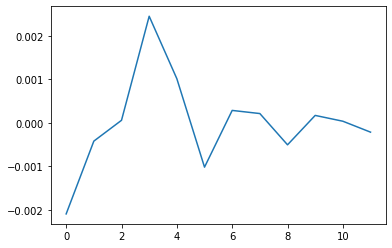

0.0024517681769866146


In [90]:
plt.plot(rr.coef_)
plt.show()
print(max(abs(rr.coef_)))

In [91]:
alpha_grid = np.logspace(-1, 5, num=50, base=10)
coefs = []

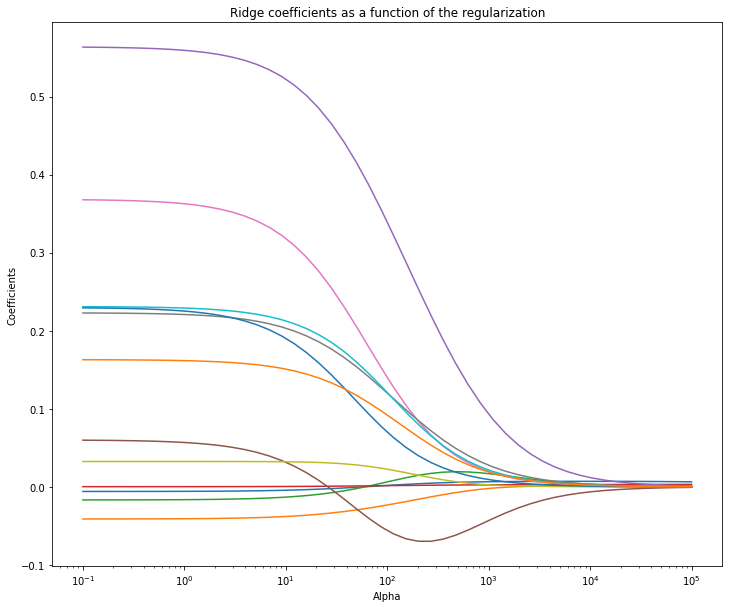

In [92]:
for a in alpha_grid:
    rr = Ridge(alpha=a, fit_intercept=False, random_state=88)
    rr.fit(train_enc_X, train_enc_Y)
    coefs.append(rr.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alpha_grid, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

### Ridge Hyper-parameter Tuning

In [93]:
alpha_grid = {'alpha': np.logspace(-1, 5, num=50, base=10)}

rr = Ridge(random_state=88)
rr_cv = GridSearchCV(rr, alpha_grid, scoring='neg_mean_squared_error', cv=10)
rr_cv.fit(train_enc_X, train_enc_Y)

GridSearchCV(cv=10, estimator=Ridge(random_state=88),
             param_grid={'alpha': array([1.00000000e-01, 1.32571137e-01, 1.75751062e-01, 2.32995181e-01,
       3.08884360e-01, 4.09491506e-01, 5.42867544e-01, 7.19685673e-01,
       9.54095476e-01, 1.26485522e+00, 1.67683294e+00, 2.22299648e+00,
       2.94705170e+00, 3.90693994e+00, 5.17947468e+00, 6.86648845e+00,
       9.10298178e+00, 1.20679264e+01, 1...
       2.68269580e+02, 3.55648031e+02, 4.71486636e+02, 6.25055193e+02,
       8.28642773e+02, 1.09854114e+03, 1.45634848e+03, 1.93069773e+03,
       2.55954792e+03, 3.39322177e+03, 4.49843267e+03, 5.96362332e+03,
       7.90604321e+03, 1.04811313e+04, 1.38949549e+04, 1.84206997e+04,
       2.44205309e+04, 3.23745754e+04, 4.29193426e+04, 5.68986603e+04,
       7.54312006e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error')

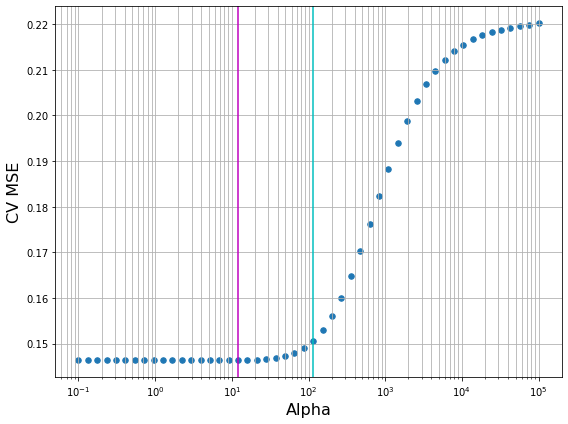

In [94]:
range_alpha = rr_cv.cv_results_['param_alpha'].data
MSE_scores = rr_cv.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='ridge',
                                       results=rr_cv.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [95]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 115.1395399326447


## Lasso Regression

### Lasso Coefficients vs. Degree of Regularization

In [96]:
alphas = np.logspace(-5, 1 , num=50, base=10)
coefs = []

In [97]:
from sklearn.linear_model import Lasso

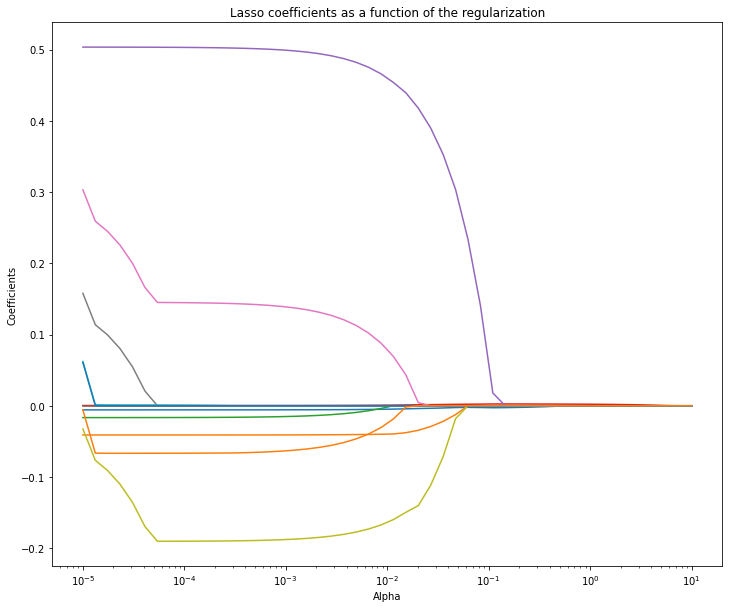

In [98]:
for a in alphas:
    lasso = Lasso(alpha=a, random_state=88)
    lasso.fit(train_enc_X, train_enc_Y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

### Lasso Hyper-parameter Tuning

In [99]:
alpha_grid = {'alpha': np.logspace(-8, -1, num=50, base=10)}

lasso_cv = GridSearchCV(lasso, alpha_grid, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(train_enc_X, train_enc_Y)

GridSearchCV(cv=10, estimator=Lasso(alpha=10.0, random_state=88),
             param_grid={'alpha': array([1.00000000e-08, 1.38949549e-08, 1.93069773e-08, 2.68269580e-08,
       3.72759372e-08, 5.17947468e-08, 7.19685673e-08, 1.00000000e-07,
       1.38949549e-07, 1.93069773e-07, 2.68269580e-07, 3.72759372e-07,
       5.17947468e-07, 7.19685673e-07, 1.00000000e-06, 1.38949549e-06,
       1.93069773e-06, 2.682...
       1.00000000e-04, 1.38949549e-04, 1.93069773e-04, 2.68269580e-04,
       3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
       1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
       5.17947468e-03, 7.19685673e-03, 1.00000000e-02, 1.38949549e-02,
       1.93069773e-02, 2.68269580e-02, 3.72759372e-02, 5.17947468e-02,
       7.19685673e-02, 1.00000000e-01])},
             scoring='neg_mean_squared_error')

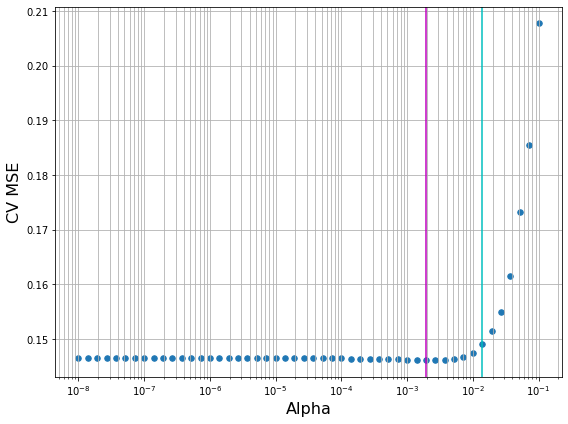

In [100]:
range_alpha = lasso_cv.cv_results_['param_alpha'].data
MSE_scores = lasso_cv.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='lasso',
                                       results=lasso_cv.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [101]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 0.01389495494373136


### Selected Variables

Let's look at some of the variables selected by lasso

In [102]:
cols = train_enc_X.columns
coefs = lasso_cv.best_estimator_.coef_
sorted(zip(abs(coefs), cols))[-28:]

[(0.0, 'Embarked_C'),
 (0.0, 'Embarked_Q'),
 (0.0, 'Pclass_2'),
 (0.0, 'Sex_male'),
 (0.000446971567380539, 'Fare'),
 (0.0056170300850108875, 'Age'),
 (0.013791609539953413, 'Parch'),
 (0.04082804777931912, 'SibSp'),
 (0.05935500808138765, 'Embarked_S'),
 (0.1326340918826321, 'Pclass_1'),
 (0.18536489980302404, 'Pclass_3'),
 (0.49510197446488224, 'Sex_female')]

#### Dummy Variable Trap

In [103]:
train_enc_X = train_enc_X.drop(columns=['Embarked_C', 'Embarked_Q', 'Pclass_2', 'Sex_male'])
train_enc_X

,Age,SibSp,Parch,Fare,Sex_female,Pclass_1,Pclass_3,Embarked_S
0,22.000000,1,0,7.2500,0,0,1,1
1,38.000000,1,0,71.2833,1,1,0,0
2,26.000000,0,0,7.9250,1,0,1,1
3,35.000000,1,0,53.1000,1,1,0,1
4,35.000000,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,0,0,1
887,19.000000,0,0,30.0000,1,1,0,1
888,29.699118,1,2,23.4500,1,0,1,1
889,26.000000,0,0,30.0000,0,1,0,0


In [104]:
test_enc = test_enc.drop(columns=['Embarked_C', 'Embarked_Q', 'Pclass_2', 'Sex_male'])
test_enc

,Age,SibSp,Parch,Fare,Sex_female,Pclass_1,Pclass_3,Embarked_S
0,34.500000,0,0,7.8292,0,0,1,0
1,47.000000,1,0,7.0000,1,0,1,1
2,62.000000,0,0,9.6875,0,0,0,0
3,27.000000,0,0,8.6625,0,0,1,1
4,22.000000,1,1,12.2875,1,0,1,1
...,...,...,...,...,...,...,...,...
413,29.699118,0,0,8.0500,0,0,1,1
414,39.000000,0,0,108.9000,1,1,0,0
415,38.500000,0,0,7.2500,0,0,1,1
416,29.699118,0,0,8.0500,0,0,1,1


### Logistic Regression Model

I chose a logistic regression model because predicting who survived(1) and who did not(0) is a binary classification problem.

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
log_mod = LogisticRegression(max_iter=500).fit(train_enc_X, train_enc_Y)

In [107]:
log_mod

LogisticRegression(max_iter=500)

In [108]:
train_preds = log_mod.predict(train_enc_X)

In [109]:
training_accuracy = log_mod.score(train_enc_X, train_enc_Y)
print('Training Accuracy: ', training_accuracy)

Training Accuracy:  0.8047138047138047


In [110]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, auc

In [111]:
log_acc = accuracy_score(train_enc_Y, train_preds)
log_acc

0.8047138047138047

In [112]:
precision_score(train_enc_Y, train_preds)

0.7692307692307693

In [113]:
recall_score(train_enc_Y, train_preds)

0.7017543859649122

In [114]:
# Confusion Matrix.
cm = confusion_matrix(train_enc_Y,  log_mod.predict(train_enc_X))
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[477  72]
 [102 240]]


In [115]:
# TPR for Logistic Regression Model
log_tpr = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
log_tpr

0.7017543859649122

In [116]:
# FPR for Random Forest Model
log_fpr = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
log_fpr

0.13114754098360656

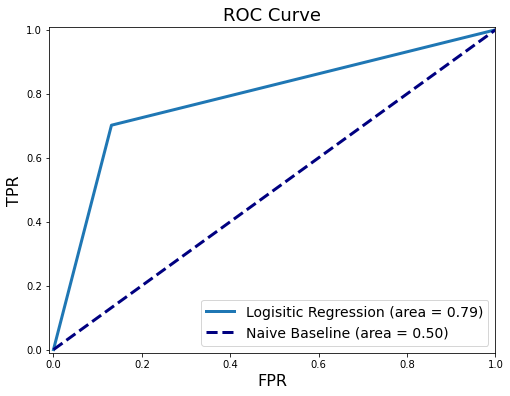

In [117]:
# ROC Curve
fpr, tpr, _ = roc_curve(train_enc_Y, log_mod.predict(train_enc_X))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logisitic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

#### Test Predictions for Logisitic Regression

In [118]:
test_preds_log = log_mod.predict(test_enc)

In [119]:
test_preds_log

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### K Nearest Neighbors

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [122]:
knn_fit = knn.fit(train_enc_X, train_enc_Y)

In [123]:
knn_acc = accuracy_score(train_enc_Y, knn_fit.predict(train_enc_X))
knn_acc

0.8069584736251403

In [124]:
# Confusion Matrix.
cm_knn = confusion_matrix(train_enc_Y, knn_fit.predict(train_enc_X))
print ("Confusion Matrix : \n", cm_knn)

Confusion Matrix : 
 [[483  66]
 [106 236]]


In [125]:
# TPR for K Nearest Neighbors 
knn_tpr = cm_knn.ravel()[3]/(cm_knn.ravel()[3]+cm_knn.ravel()[2])
knn_tpr

0.6900584795321637

In [126]:
# FPR for Random Forest Model
knn_fpr = cm_knn.ravel()[1]/(cm_knn.ravel()[1]+cm_knn.ravel()[0])
knn_fpr

0.12021857923497267

### Random Forest Model With Cross Validation

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

import time

In [128]:
grid_values = {'max_features': np.linspace(1,8,8, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf = RandomForestClassifier() 
# Note: here we set verbose=2 to keep track of the progress (the running time) of the cross validation. 
cv = KFold(n_splits=10,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='accuracy', cv=cv,verbose=2)
rf_cv.fit(train_enc_X, train_enc_Y)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.1s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.0s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.0s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.1s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.0s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.1s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.1s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.1s
[CV] END max_features=1, min_samples_leaf=5, n_e

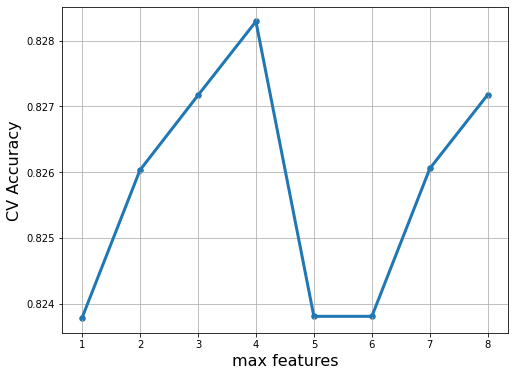

In [129]:
# Plotting the graph to determine the best hyperparameter 'm'
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')

In [130]:
print(rf_cv.best_params_)

{'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [131]:
rf_acc = accuracy_score(train_enc_Y, rf_cv.predict(train_enc_X))
rf_acc

0.8843995510662177

In [132]:
# Confusion Matrix.
cm_rf = confusion_matrix(train_enc_Y, rf_cv.predict(train_enc_X))
print ("Confusion Matrix : \n", cm_rf)

Confusion Matrix : 
 [[520  29]
 [ 74 268]]


In [133]:
# TPR for Random Forest Model With CV
rf_tpr = cm_rf.ravel()[3]/(cm_rf.ravel()[3]+cm_rf.ravel()[2])
rf_tpr

0.783625730994152

In [134]:
# FPR for Random Forest Model With CV
rf_fpr = cm_rf.ravel()[1]/(cm_rf.ravel()[1]+cm_rf.ravel()[0])
rf_fpr

0.052823315118397086

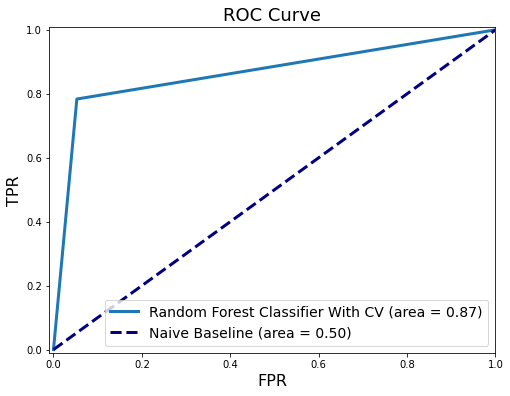

In [135]:
# ROC Curve
fpr, tpr, _ = roc_curve(train_enc_Y, rf_cv.predict(train_enc_X))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Random Forest Classifier With CV (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [136]:
test_preds_rf_cv = rf_cv.predict(test_enc)
test_preds_rf_cv

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Random Forest Without Cross Validation

In [137]:
forest = RandomForestClassifier() 
forest.fit(train_enc_X, train_enc_Y)

RandomForestClassifier()

In [138]:
forest_acc = accuracy_score(train_enc_Y, forest.predict(train_enc_X))
forest_acc

0.9820426487093153

In [139]:
# Confusion Matrix.
cm_forest = confusion_matrix(train_enc_Y, forest.predict(train_enc_X))
print ("Confusion Matrix : \n", cm_forest)

Confusion Matrix : 
 [[543   6]
 [ 10 332]]


In [140]:
# TPR for Random Forest Model WO Cross Validation
forest_tpr = cm_forest.ravel()[3]/(cm_forest.ravel()[3]+cm_forest.ravel()[2])
forest_tpr

0.9707602339181286

In [141]:
# FPR for Random Forest Model
forest_fpr = cm_forest.ravel()[1]/(cm_forest.ravel()[1]+cm_forest.ravel()[0])
forest_fpr

0.01092896174863388

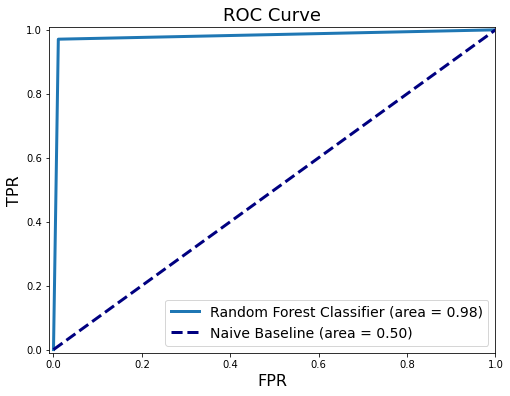

In [142]:
# ROC Curve
fpr, tpr, _ = roc_curve(train_enc_Y, forest.predict(train_enc_X))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Random Forest Classifier (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [143]:
test_preds_rf = forest.predict(test_enc)
test_preds_rf

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

###  Feature Importance

In [144]:
train_enc_X.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Pclass_1', 'Pclass_3',
       'Embarked_S'],
      dtype='object')

In [145]:
importances = pd.DataFrame({'feature': train_enc_X.columns, 'importance': forest.feature_importances_})
importances = importances.sort_values('importance', ascending=False)

In [146]:
importances

,feature,importance
3,Fare,0.276291
0,Age,0.265239
4,Sex_female,0.258747
6,Pclass_3,0.063065
1,SibSp,0.043739
2,Parch,0.039305
5,Pclass_1,0.030402
7,Embarked_S,0.023211


### Final Metrics Table

In [147]:

comparison_data = {'Logistic Regression': ['{:.3f}'.format(log_acc),
                                              '{:.4f}'.format(log_tpr),
                                              '{:.3f}'.format(log_fpr)], 
                   'K Nearest Neighbors': ['{:.3f}'.format(knn_acc),
                                              '{:.4f}'.format(knn_tpr),
                                              '{:.3f}'.format(knn_fpr)], 
    'Random Forest Classifier With CV': ['{:.3f}'.format(rf_acc),
                                              '{:.4f}'.format(rf_tpr),
                                              '{:.3f}'.format(rf_fpr)], 
                   'Random Forest Classifier': ['{:.3f}'.format(forest_acc),
                                              '{:.4f}'.format(forest_tpr),
                                              '{:.3f}'.format(forest_fpr)] 
                  }


comparison_table = pd.DataFrame(data=comparison_data, index=['Accuracy', 'TPR', 'FPR'])
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

,Logistic Regression,K Nearest Neighbors,Random Forest Classifier With CV,Random Forest Classifier
Accuracy,0.805,0.807,0.884,0.982
TPR,0.7018,0.6901,0.7836,0.9708
FPR,0.131,0.120,0.053,0.011


### Submitting to Kaggle

In [151]:
# Construct and save the submission:
submission_df = pd.DataFrame({
    "PassengerId": passengerID_test, 
    "Survived": test_preds_rf_cv,
}, columns=['PassengerId', 'Survived'])

In [152]:
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [153]:
from datetime import datetime

timestamp = datetime.isoformat(datetime.now()).split(".")[0]
submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2021-10-18T15:53:24.csv.
You may now upload this CSV file to Kaggle for scoring.
